In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Cuisine_rating.csv")

In [ ]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


##Melihat apakah terdapat nilai null

In [ ]:
df.isna().sum() #no null value

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

##Melihat Persebaran Jenis-jenis Cuisines

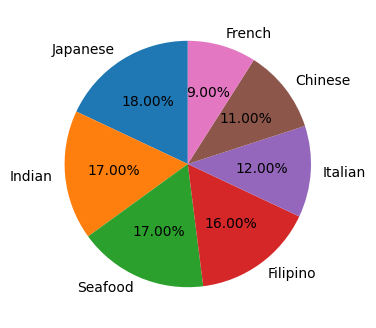

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(df['Cuisines'].value_counts(), labels=df['Cuisines'].unique(),
        startangle=90, autopct='%1.2f%%')
plt.show()

##Meninjau Preferensi Cuisines berdasarkan Gender


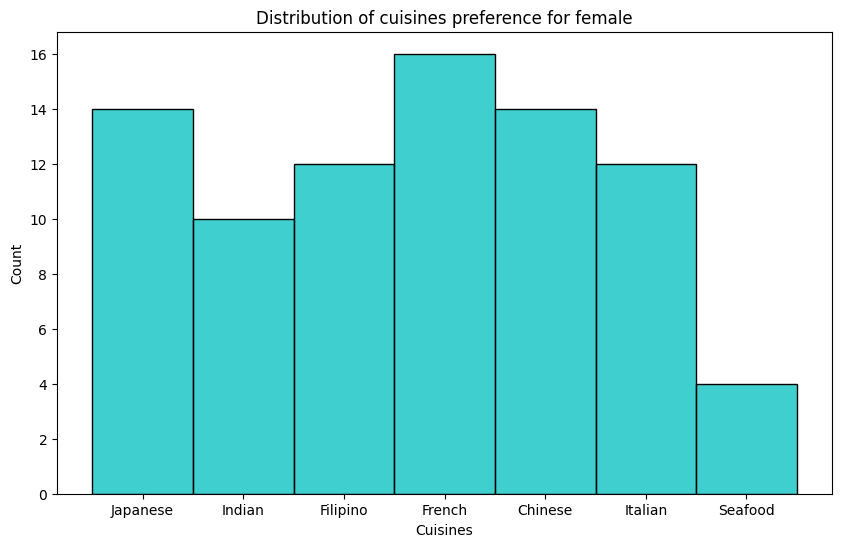

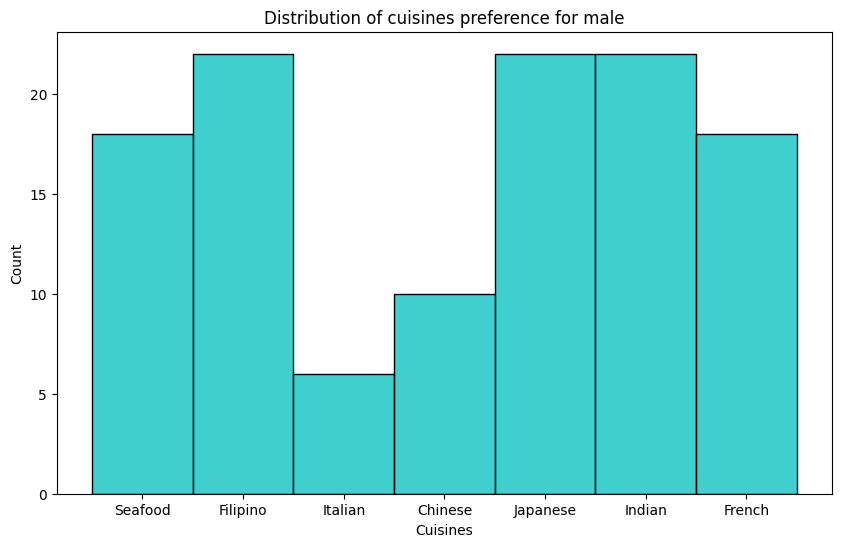

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[(df["Gender"] == 'Female')]["Cuisines"],color='c', kde=False)
plt.title('Distribution of cuisines preference for female')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[(df["Gender"] == 'Male')]["Cuisines"],color='c', kde = False)
plt.title('Distribution of cuisines preference for male')
plt.show()

##Preferensi Cuisines Berdasarkan Activity


<Figure size 1000x600 with 0 Axes>

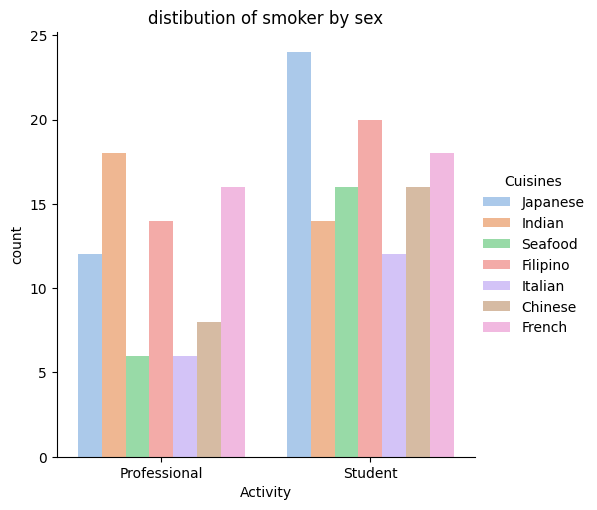

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x = "Activity", kind = "count", hue = "Cuisines", palette="pastel", data=df)
plt.title("distibution of cuisines by activity")
plt.show()

##Persebaran Budget Berdasarkan Activity

<Figure size 1000x600 with 0 Axes>

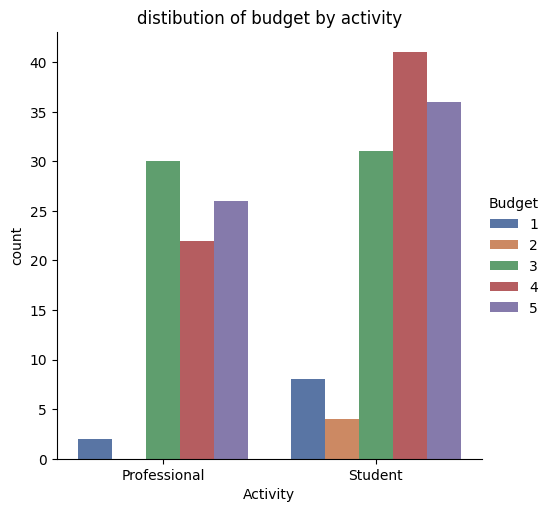

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x = "Activity", kind = "count", hue = "Budget", palette="deep", data=df)
plt.title("distibution of budget by activity")
plt.show()

## Melihat distribusi Restaurant Visits Berdasarkan Activity

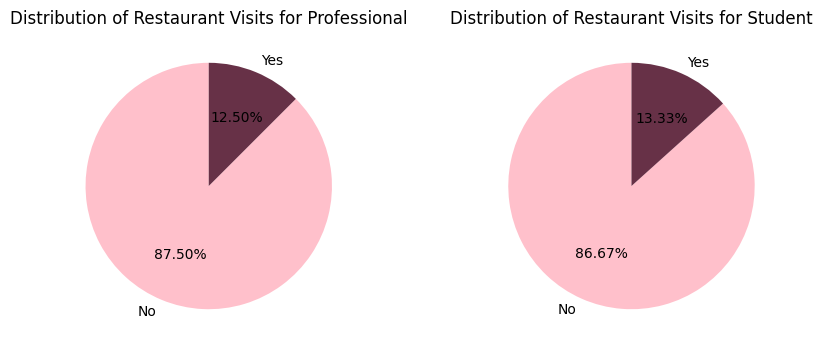

In [ ]:
unique_activities = df["Activity"].unique()
fig, axs = plt.subplots(1, len(unique_activities), figsize=(10, 4))
for i, activity in enumerate(unique_activities):
    subset = df[df["Activity"] == activity]["Often A S"]
    counts = subset.value_counts()
    axs[i].pie(counts, labels=counts.index, startangle=90, autopct='%1.2f%%', colors = ['#FFC0CB', '#673147'],)
    axs[i].set_title(f"Distribution of Restaurant Visits for {activity}")
plt.show()

##Distribusi Cuisines Berdasarkan Lokasi

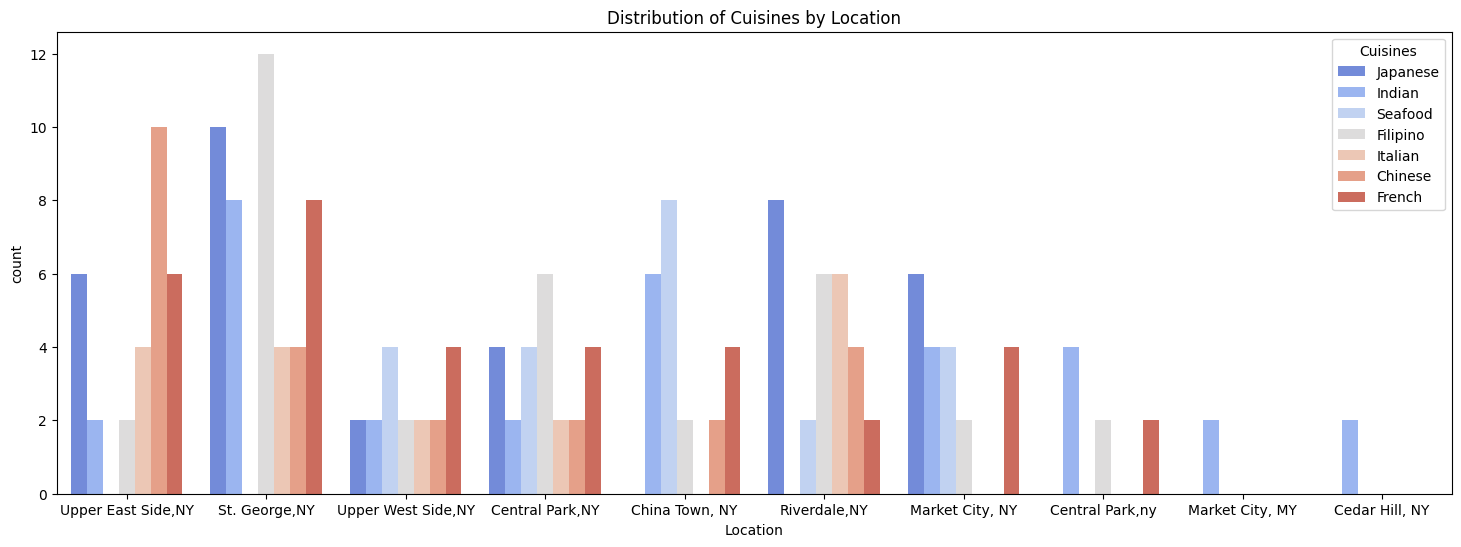

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Location", hue="Cuisines", palette="coolwarm", data=df)
plt.title('Distribution of Cuisines by Location')
plt.show()

##Food Rating Berdasarkan Cuisines

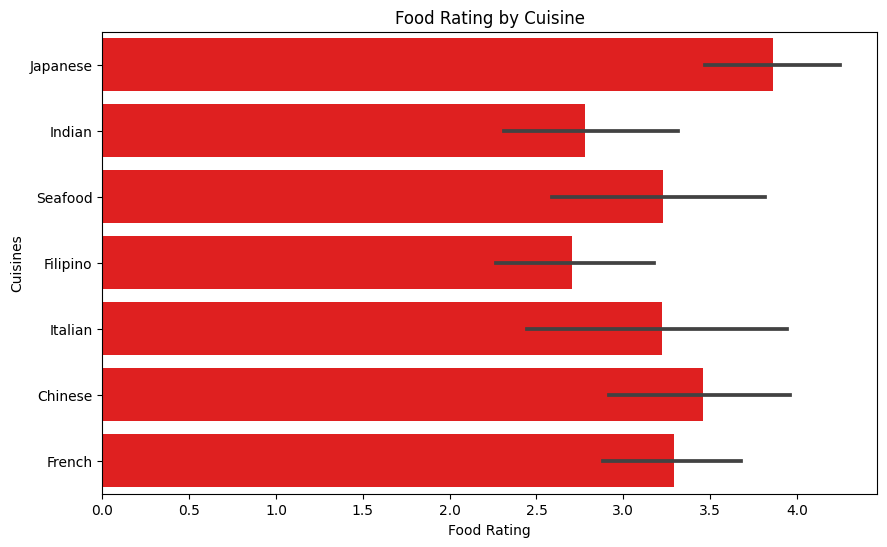

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Cuisines', x='Food Rating', data=df, color='red')
plt.xlabel('Food Rating')
plt.ylabel('Cuisines')
plt.title('Food Rating by Cuisine')
plt.show()

##Distribusi Rating Berdasarkan Gender

<Figure size 1000x600 with 0 Axes>

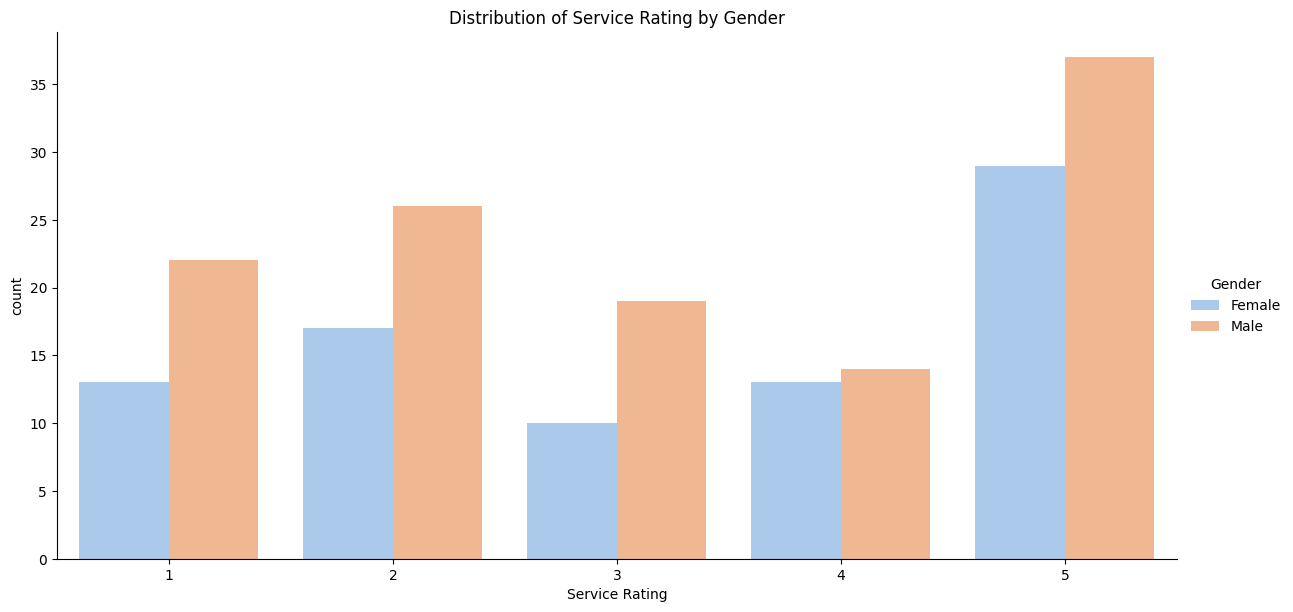

<Figure size 1000x600 with 0 Axes>

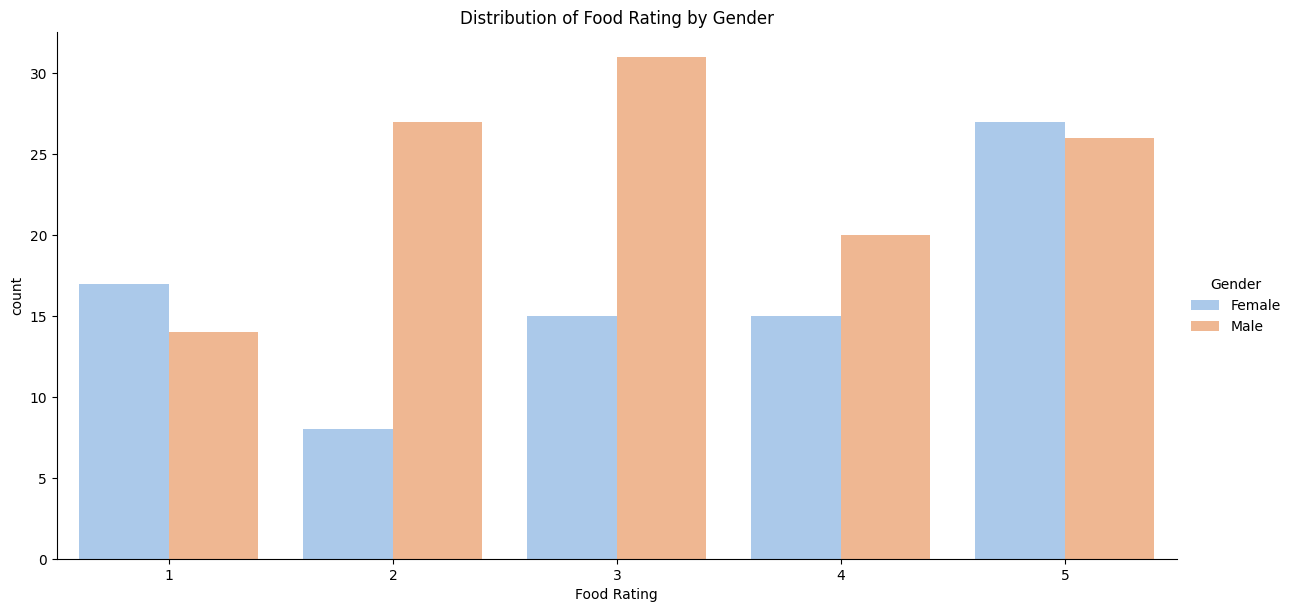

<Figure size 1000x600 with 0 Axes>

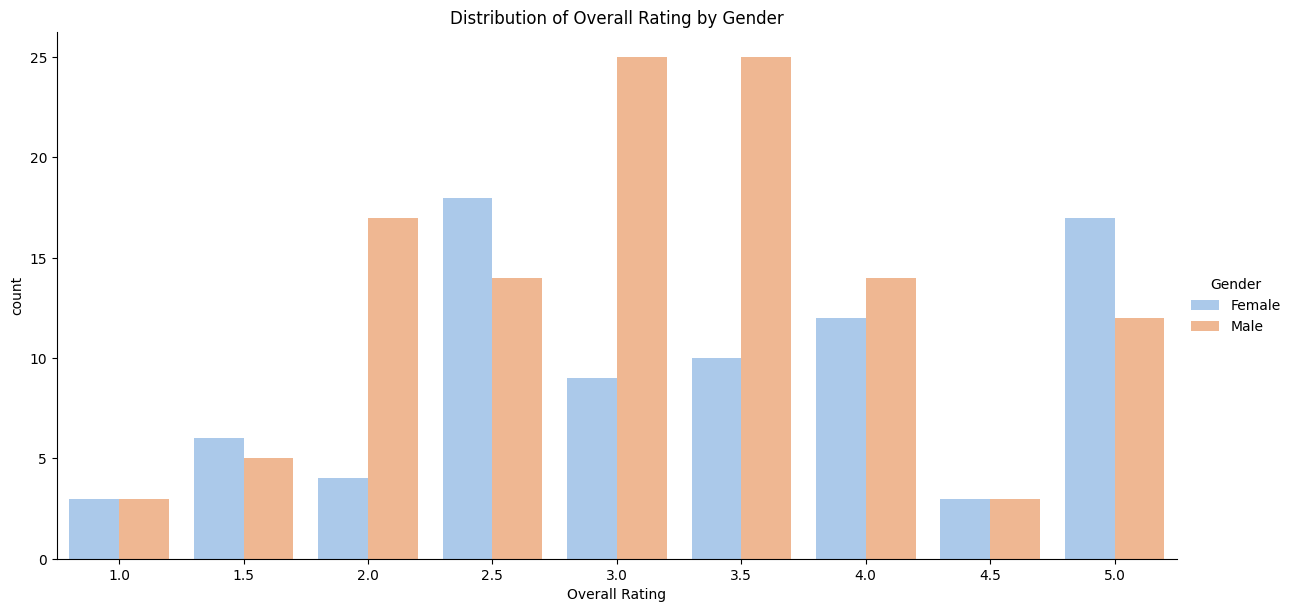

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x="Service Rating", kind="count", hue="Gender", palette="pastel", data=df, height=6, aspect=2)
plt.title("Distribution of Service Rating by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x="Food Rating", kind="count", hue="Gender", palette="pastel", data=df, height=6, aspect=2)
plt.title("Distribution of Food Rating by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x="Overall Rating", kind="count", hue="Gender", palette="pastel", data=df, height=6, aspect=2)
plt.title("Distribution of Overall Rating by Gender")
plt.show()

##Distribusi Food Rating Berdasarkan Status Pernikahan

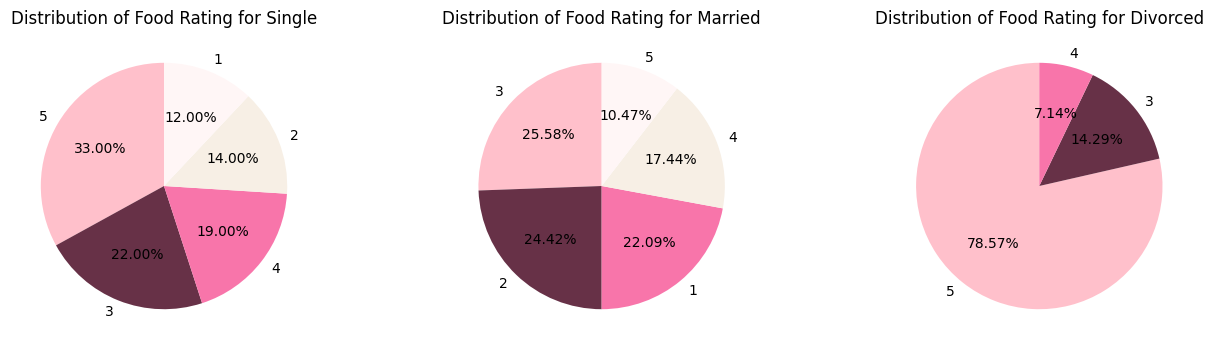

In [ ]:
unique_maritalstatus = df["Marital Status"].unique()
fig, axs = plt.subplots(1, len(unique_maritalstatus), figsize=(16, 4))
for i, marital_status in enumerate(unique_maritalstatus):
    subset = df[df["Marital Status"] == marital_status]['Food Rating']
    counts = subset.value_counts()
    axs[i].pie(counts, labels=counts.index, startangle=90, autopct='%1.2f%%', colors = ['#FFC0CB', '#673147', "#F875AA", "#F7EFE5", "#FFF6F6"],)
    axs[i].set_title(f"Distribution of Food Rating for {marital_status}")
plt.show()

##Food Rating vs Service Rating

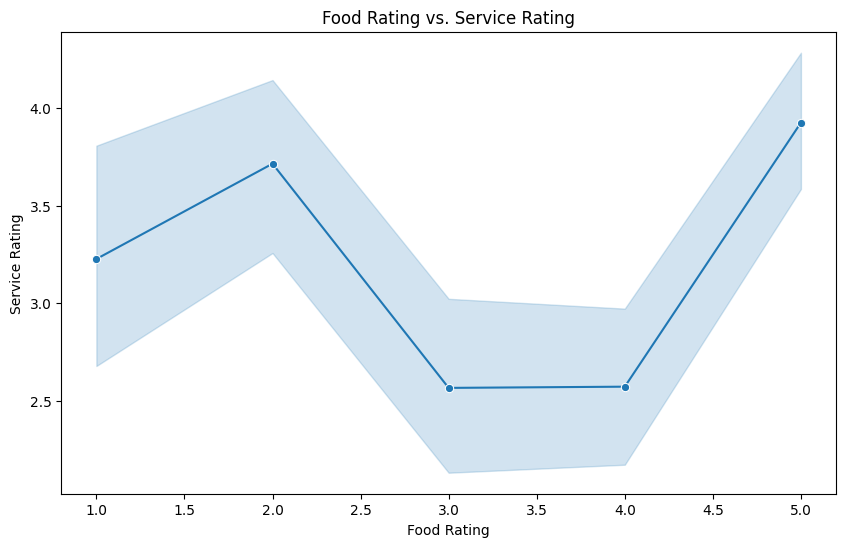

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Food Rating', y='Service Rating', data=df, marker='o')
plt.title('Food Rating vs. Service Rating')
plt.show()

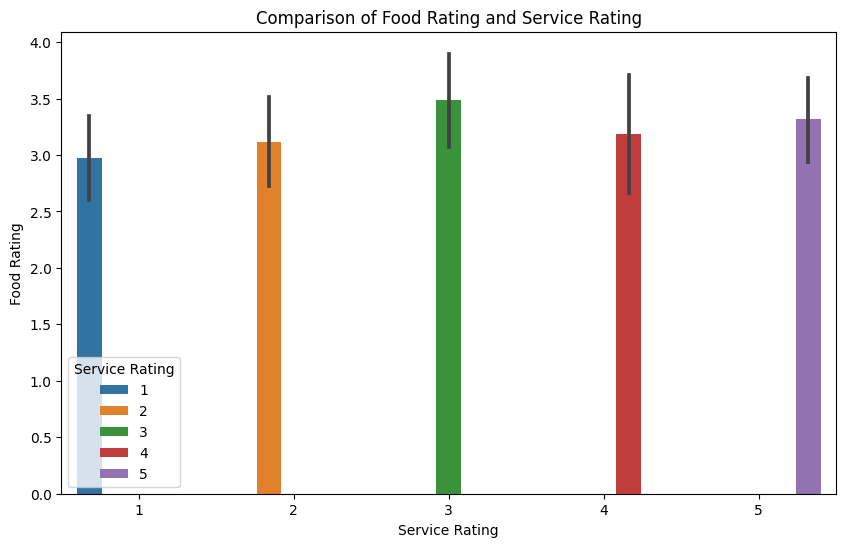

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Service Rating', y='Food Rating', data=df, hue='Service Rating')
plt.title('Comparison of Food Rating and Service Rating')
plt.show()